In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# components = {
#     "cont": [],
#     "O3": [],
#     "H2O": [],
#     "CO2": [],
#     "PMO": [],
#     "CH4": [],
#     "SWV":[],
# }

scenarios = {"GCurTec": 'r',
             "GBAU_SSP1-1_9": 'g',
             "GBAU_SSP2-4_5": 'b',
             "GBAU_SSP3-7_0": 'y',
             "GBAU_SSP4-6_0": 'black', 
             "GFP2050": 'grey', 
             "GFP2050cont": 'purple'}
time_range = np.arange(2000,2101,1)

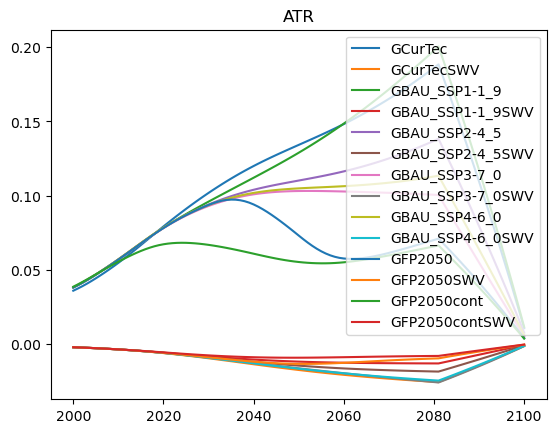

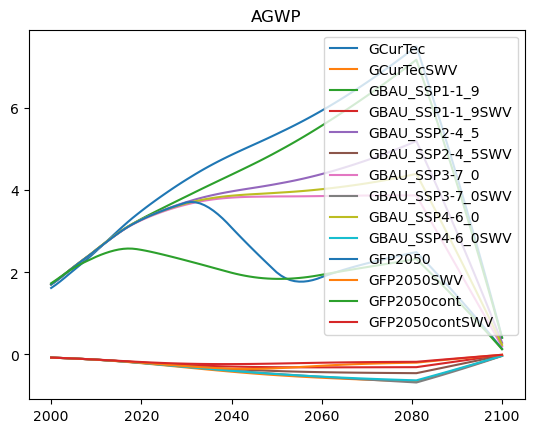

In [14]:

for scenario in scenarios.keys():
    ds_p = f"results_{scenario}/{scenario}_metrics.nc"
    ds = xr.open_dataset(ds_p)
    ATR_20 = [ds[f'ATR_20_{t}'].values[-1] for t in time_range]
    plt.plot(time_range, ATR_20, label=scenario)
    ATR_20_SWV = [ds[f'ATR_20_{t}'].sel(species='SWV').values for t in time_range]
    plt.plot(time_range, ATR_20_SWV, label=scenario+'SWV')
plt.title('ATR')
plt.legend()
plt.show()


for scenario in scenarios.keys():
    ds_p = f"results_{scenario}/{scenario}_metrics.nc"
    ds = xr.open_dataset(ds_p)
    AGWP_20 = [ds[f'AGWP_20_{t}'].values[-1] for t in time_range]
    plt.plot(time_range, AGWP_20, label=scenario)
    AGWP_20_SWV = [ds[f'AGWP_20_{t}'].sel(species='SWV').values for t in time_range]
    plt.plot(time_range, AGWP_20_SWV, label=scenario+'SWV')
plt.title('AGWP')

plt.legend()
plt.show()

[np.float32(0.0385822), np.float32(0.04012451), np.float32(0.041743837), np.float32(0.043429766), np.float32(0.04517121), np.float32(0.04693185), np.float32(0.048690464), np.float32(0.050430592), np.float32(0.052133996), np.float32(0.053799406), np.float32(0.05543534), np.float32(0.057024058), np.float32(0.05855405), np.float32(0.060015574), np.float32(0.06139724), np.float32(0.06268741), np.float32(0.06386935), np.float32(0.06492619), np.float32(0.0658401), np.float32(0.06659648), np.float32(0.06719267), np.float32(0.0676396), np.float32(0.067948334), np.float32(0.068130895), np.float32(0.068198964), np.float32(0.06816384), np.float32(0.06803646), np.float32(0.06782742), np.float32(0.06754595), np.float32(0.06720003), np.float32(0.06679652), np.float32(0.06634231), np.float32(0.06584546), np.float32(0.065310076), np.float32(0.06474066), np.float32(0.064141095), np.float32(0.06351564), np.float32(0.06286888), np.float32(0.06220468), np.float32(0.06152626), np.float32(0.060836222), np.f

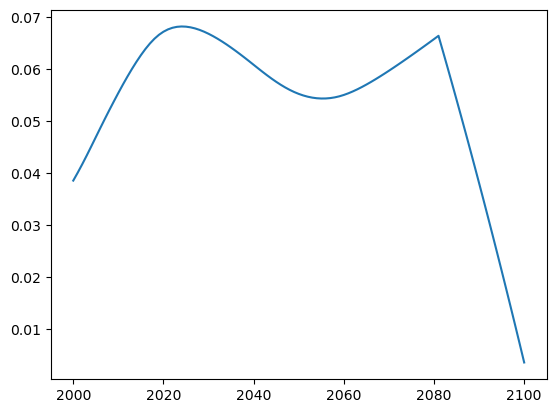

In [15]:
time_range = np.arange(2000,2101,1)
# for t in time_range:
q = [ds[f'ATR_20_{t}'].values[-1] for t in time_range]
print(q)
plt.plot(time_range, q)

# for t in time_range:
#     q = ds[f'ATR_20_{t}'].values[-1]
#     print(q)


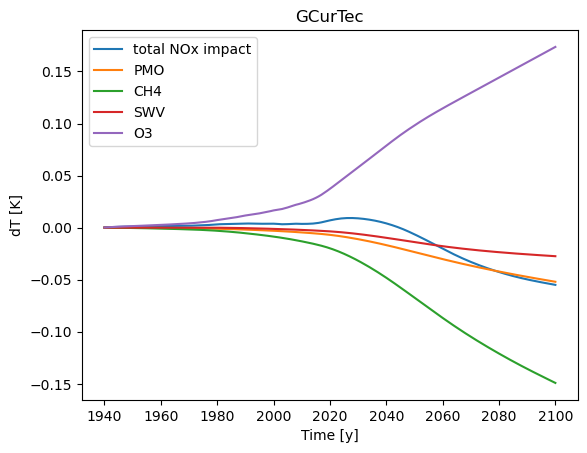

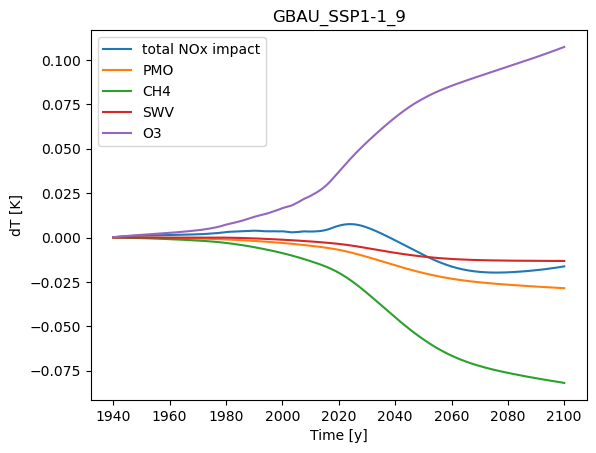

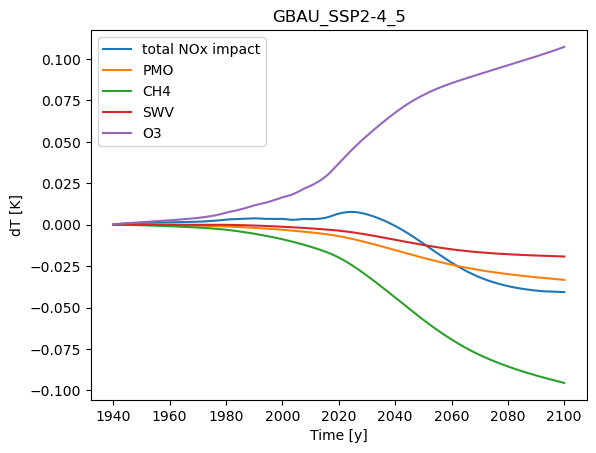

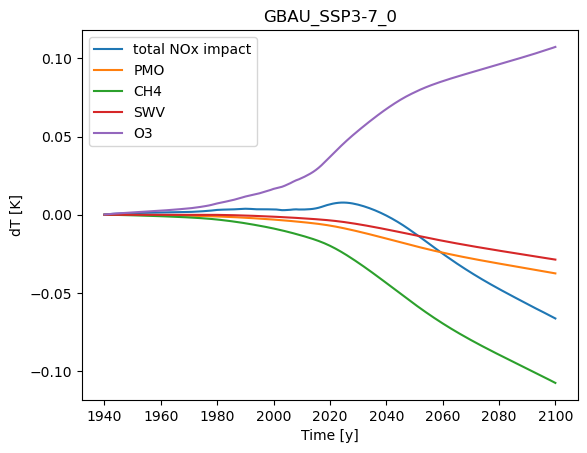

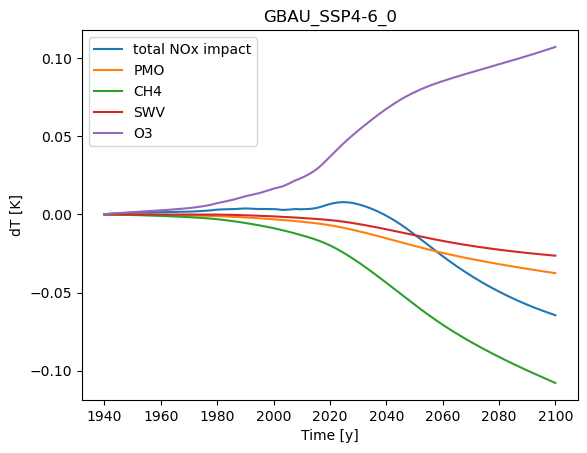

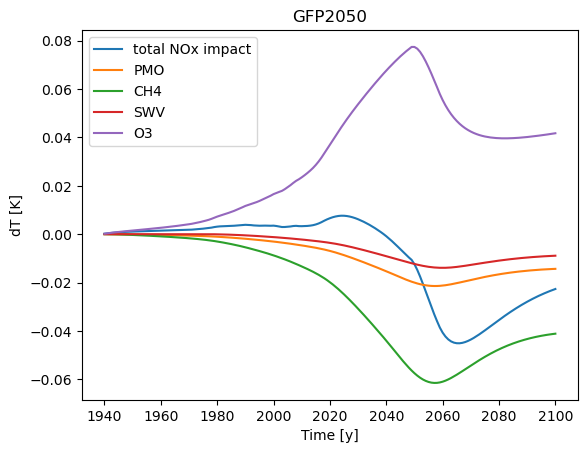

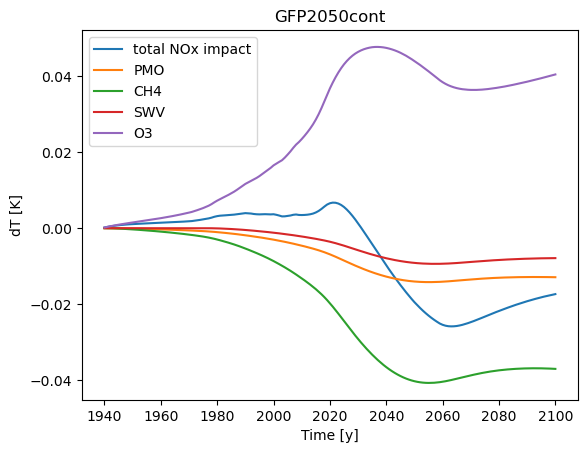

In [28]:
import xarray as xr

NOx_species = ['PMO', 'CH4', 'SWV', 'O3']

NOx_impact_dict = {}
for scenario in scenarios.keys():
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
# a = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\results_GFP2050cont\GFP2050cont.nc"
    data = xr.open_dataset(ds_path)
    summed = sum(data[f'dT_{spec}'][0].values for spec in NOx_species) # THIS WORKS!, made myself and very fast
    NOx_impact_dict[scenario] = summed
    # print(q[23])
    plt.plot(data['time'].values, summed, label='total NOx impact')
    
    for spec in NOx_species:
        plt.plot(data['time'].values, data[f'dT_{spec}'][0].values, label=spec)
        # print(data[f'RF_{spec}'][0].values[23])
    plt.legend()
    plt.title(scenario)
    plt.xlabel("Time [y]")
    plt.ylabel(f"dT [K]")
    plt.show()

        


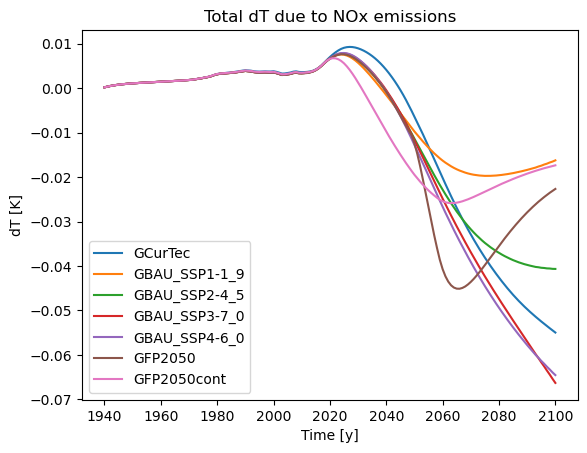

In [31]:
for scenario in NOx_impact_dict.keys():
    plt.plot(data['time'].values, NOx_impact_dict[scenario], label=scenario)
plt.title('Total dT due to NOx emissions')
plt.legend()
plt.xlabel("Time [y]")
plt.ylabel(f"dT [K]")
plt.show()


C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4
C:\Users\atzeh\AppData\Local\Temp\ipykernel_32528\875502409.py:13: RuntimeWarning: invalid value encountered in divide
  ratio = SWV/CH4


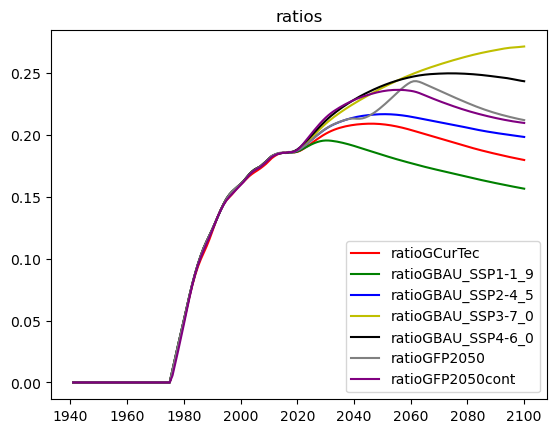

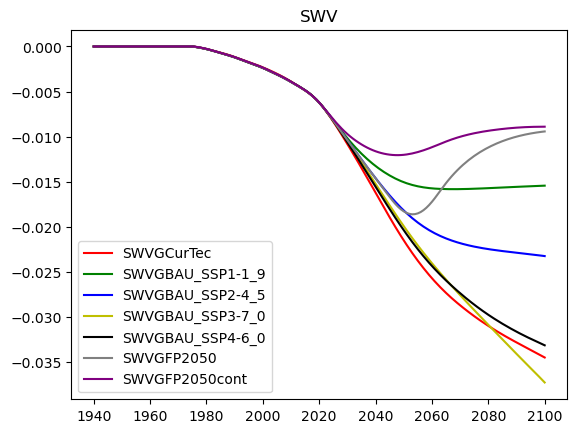

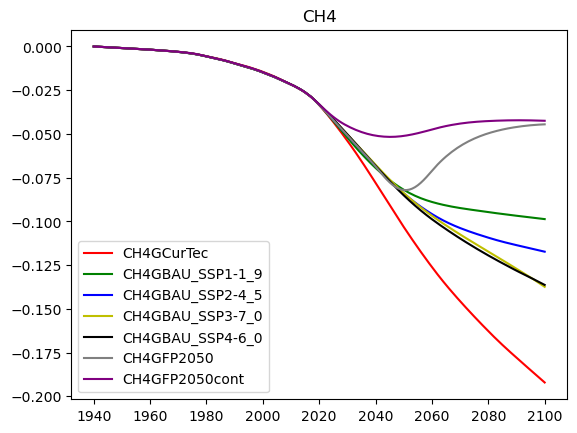

In [20]:
import xarray as xr

NOx_species = ['PMO', 'CH4', 'SWV', 'O3']


for scenario in scenarios.keys():
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
    data = xr.open_dataset(ds_path)
    SWV = data[f'RF_SWV'][0].values
    CH4 = data[f'RF_CH4'][0].values
    ratio = SWV/CH4
    plt.plot(data['time'].values, ratio, label='ratio'+scenario,color=scenarios[scenario])
plt.legend()
plt.title("ratios")
plt.show()


for scenario in scenarios:
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
    data = xr.open_dataset(ds_path)
    SWV = data[f'RF_SWV'][0].values
    # CH4 = data[f'RF_CH4'][0].values
    # ratio = SWV/CH4
    plt.plot(data['time'].values, SWV, label='SWV'+scenario, color=scenarios[scenario])
plt.legend()
plt.title("SWV")
plt.show()
        
for scenario in scenarios:
    # if scenario != 'GFP2050':
    #     continue
    ds_path = f"results_{scenario}/{scenario}.nc"
    data = xr.open_dataset(ds_path)
    CH4 = data[f'RF_CH4'][0].values
    # CH4 = data[f'RF_CH4'][0].values
    # ratio = SWV/CH4
    plt.plot(data['time'].values, CH4, label='CH4'+scenario, color=scenarios[scenario])
plt.legend()
plt.title("CH4")
plt.show()